In [1]:
import pandas as pd
import os

import scipy.stats
from scipy.stats import hypergeom
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
from itertools import combinations
%pylab inline
import collections
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
ba_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_ba.csv",sep=',')
sc_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_sc.csv",sep=',')

#single cell DE data as binary matrix 
sc=pd.read_csv("../../data/scRNAseq_Cengen2020/071020_sc_neuron_class_vs_all_DE_WX_binary.csv",sep=',')

#import brain atlas data
ba=pd.read_csv("../../data/BrainAtlas/Binary Brain atlas V17_w_120619_HB_data_Jan_10_2020.csv",sep=",")


In [3]:
data_source='sc'
df=sc_df

In [11]:
data_source='ba'
df=ba_df

In [4]:

def piechart(labels,sizes,explode,leg_title,data_source,colorlist):
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels,autopct='', textprops=dict(color="w"),shadow=False, startangle=90, colors=colorlist)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    ax1.legend(wedges, labels,
          title=leg_title,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    #bbox_to_anchor=(1, 0, 0.5, 1)
    #plt.title(data_source)
    plt.tight_layout()
    plt.savefig('../../output/figure_parts/Fig8B_piechart_%s_%s110119.pdf' %(data_source,leg_title))
    plt.show()

nclass sum sizes 531


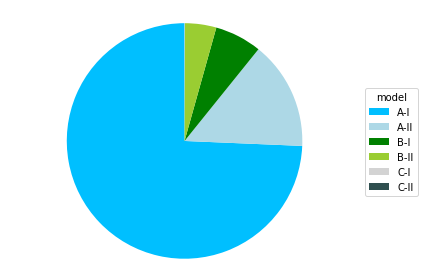

117 neuron classes in sc
['A-I', 'A-II', 'B-I', 'B-II', 'C-I', 'C-II']
[1384, 277, 120, 80, 1, 0]
sum sizes 1862
['74.3', '14.9', '6.4', '4.3', '0.1', '0.0']
nc count, tf count per model [(116, 124), (91, 59), (47, 34), (33, 25), (1, 1), (0, 0)]
136 116


In [5]:
#Figure 8B pie chart overview

def getModel_count(mod,df):
    return len(df.loc[df["model"]==mod])

def getModel_count_nc_tf(mod,df):
    r=df.loc[df["model"]==mod]
    nc_count=len(r["neuron_class"].drop_duplicates())
    tf_count=len(r["TF"].drop_duplicates())
    return nc_count,tf_count

colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']
labels=["A-I","A-II","B-I","B-II","C-I","C-II"]   
sizes=[getModel_count(mod,df) for mod in labels]
nclass_tf_sizes=[getModel_count_nc_tf(mod,df) for mod in labels]
print('nclass sum sizes',sum(nclass_tf_sizes))



explode=(0,0,0,0,0,0)
leg_title='model'
piechart(labels,sizes,explode,leg_title,data_source,colorlist)

neuron_classes=df["neuron_class"].drop_duplicates()
print('%s neuron classes in %s' %(len(neuron_classes),data_source))
sizes_prop=['%.1f' %(i/sum(sizes)*100) for i in sizes]
print(labels)
print(sizes)
print('sum sizes',sum(sizes))

print(sizes_prop)
print('nc count, tf count per model',nclass_tf_sizes)
nclass_sizes=[i[0] for i in  nclass_tf_sizes]
tf_sizes=[i[1] for i in  nclass_tf_sizes]

len_TF=len(df['TF'].drop_duplicates())
len_nclass=len(df["neuron_class"].drop_duplicates())
#subtractf for RIV?  (should have been combined with RIV, and ceh-10--ttx-3)
print(len_TF-1,len_nclass-1)

In [6]:
#add 1 nc to  to A-I and A-2
sc_df.loc[sc_df["neuron_class"]=="PVC"].sort_values(ascending=True, by=['rs_pval*'])

Unnamed: 0 model      TF      motif_ID neuron_class  marker_count  \
1698        1698   A-I  ztf-11   M00650_2.00          PVC           427   
4              4   A-I   cfi-1   M01667_2.00          PVC           427   
1053        1053   A-I   egl-5   M09581_2.00          PVC           427   
1204        1204   A-I   unc-3  OH2011_UNC-3          PVC           427   
863          863   A-I  ceh-14   M00435_2.00          PVC           427   
1168        1168   A-I   gei-3   M00711_2.00          PVC           427   
1609        1609   A-I   pag-3   M00619_2.00          PVC           427   
1276        1276   A-I  lin-31   M00665_2.00          PVC           427   
1113        1113   A-I  vab-15   M00555_2.00          PVC           427   
738          738   A-I  ceh-18   M00681_2.00          PVC           427   
1383        1383   A-I   ztf-3   M00640_2.00          PVC           427   
1289        1289   A-I  daf-16   M01989_2.00          PVC           427   
389          389   A-I  ceh-48   M01905_2.00          PVC           427   
623          623   A-I  ceh-58   M00676_2.00          PVC           427   
848          848   A-I   lim-7   M01242_2.00          PVC           427   
1505        1505   A-I   ztf-9   M00636_2.00          PVC           427   
506          506   A-I  ceh-74   M01248_2.00          PVC           427   
272          272   A-I  ceh-38   M03716_2.00          PVC           427   
946          946  A-II   nsy-7   M00966_2.00          PVC           427   

      obs_motif   exp_motif        fc       hg_pval       rs_pval  \
1698        311  274.317856  1.133721  8.350000e-05  4.070000e-36   
4           307  246.883946  1.243499  7.970000e-10  6.830000e-32   
1053        279  214.010003  1.303677  1.020000e-10  2.340000e-31   
1204        178   86.849258  2.049528  2.970000e-24  1.930000e-27   
863         317  245.290186  1.292347  2.250000e-13  9.730000e-27   
1168        234  145.117100  1.612491  4.280000e-19  1.200000e-25   
1609        278  210.588733  1.320109  2.190000e-11  9.380000e-25   
1276        312  253.386483  1.231321  1.520000e-09  5.740000e-21   
1113        237  156.847168  1.511025  1.270000e-15  4.040000e-20   
738         280  197.243655  1.419564  2.930000e-16  7.450000e-20   
1383        249  142.673335  1.745246  1.600000e-26  1.330000e-17   
1289        252  162.797203  1.547938  8.890000e-19  1.150000e-14   
389         277  207.316214  1.336123  4.920000e-12  1.050000e-13   
623         219  140.335822  1.560542  1.560000e-15  3.600000e-12   
848         249  158.440928  1.571564  2.220000e-19  7.110000e-12   
1505        205  113.433164  1.807232  8.530000e-22  8.500000e-12   
506         186   97.070568  1.916132  4.360000e-22  8.600000e-12   
272         275  208.782472  1.317160  5.010000e-11  7.260000e-10   
946         195  114.601921  1.701542  2.710000e-17  2.413604e-01   

      best_subset_rs_pval  num_genes_in_subset      hg_pval*      rs_pval*  \
1698         2.990000e-68                  202  1.255520e-04  2.000000e-34   
4            1.320000e-69                  189  2.310000e-09  2.350000e-30   
1053         1.050000e-62                  174  3.310000e-10  7.790000e-30   
1204         7.840000e-48                  128  5.020000e-23  4.550000e-26   
863          3.850000e-65                  179  1.020000e-12  2.150000e-25   
1168         1.880000e-51                  153  3.870000e-18  2.330000e-24   
1609         8.950000e-59                  158  7.730000e-11  1.650000e-23   
1276         7.200000e-58                  171  4.270000e-09  6.430000e-20   
1113         5.120000e-50                  142  7.730000e-15  4.200000e-19   
738          2.850000e-51                  145  1.930000e-15  7.620000e-19   
1383         1.420000e-47                  139  3.630000e-25  1.080000e-16   
1289         1.930000e-44                  137  7.810000e-18  7.260000e-14   
389          4.610000e-48                  148  1.910000e-11  5.830000e-13   
623          5.360000e-45       

In [7]:

def get_sc_genes(neuron_class):
    return sorted(list(sc.loc[sc[neuron_class]==1]["gene_name"].values))
def get_ba_genes(neuron_class):
    df=ba.loc[ba["class"]==neuron_class]
    
    df=df.transpose()[4:]
    df.columns=list(range(len(df.columns)))
    genes=[]
    for i in range(len(df.columns)):
        g=list(df.index[df[i]==1])
        genes=genes+g
    #if gene is in isoform notation, reduce to main gene name (targetortho doesn't distinguish isoforms)
    correct_these={'inx-1a':'inx-1','inx-1b':'inx-1','inx-18a':'inx-18','inx-18b':'inx-18','inx-10a':'inx-10','inx-10b':'inx-10'}
    genes_corrected=[]
    for gene in genes:
        if gene not in correct_these.keys():
            genes_corrected.append(gene)
        else:
            genes_corrected.append(correct_these[gene])
    genes=list(set(genes_corrected))
    return sorted(list(set(genes)))

In [8]:
print(len(df.loc[(df['model']=='C-I') | (df['model']=='C-II')][["TF","neuron_class","model"]].drop_duplicates()))
#what are the C results?
for tf, nc, m in df.loc[(df['model']=='C-I') | (df['model']=='C-II')][["TF","neuron_class","model"]].drop_duplicates().values:
    if data_source=='ba':
        print(tf, nc, m, tf in get_ba_genes(nc))
    else:
        print(tf, nc, m, tf in get_sc_genes(nc))

1
ceh-32 IL1 C-I True


In [9]:
#because testing TFs from BRain atlas or single cell expressed data, sometimes a TF that's in a BA neuron class is not in the DE genes of the same sc neuron cluster. 
##top 6 experssed TFs are expressed in many neurons (top 3 are in all 111 classes analyzed), check if these are differentially expressed in the neruon classes that they are shown to be c type regulators in. 
#is ceh-74

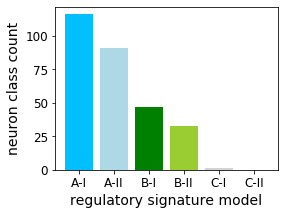

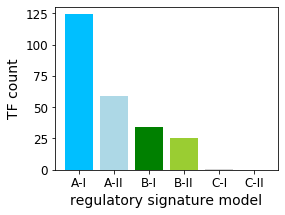

In [10]:
nc_counts=[i[0] for i in nclass_tf_sizes][:6]
tf_counts=[i[1] for i in nclass_tf_sizes][:6]

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize

models=["A-I","A-II","B-I","B-II","C-I","C-II"]   
colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']

rcParams['figure.figsize'] = 4, 3
plt.bar(range(len(models)),nc_counts,color=colorlist)
ind = np.arange(len(models))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("neuron class count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig8_barplot_nc_count_models.pdf')
plt.show()

rcParams['figure.figsize'] = 4, 3
plt.bar(range(len(models)),tf_counts,color=colorlist)
ind = np.arange(len(models))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("TF count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig8_barplot_tf_count_models.pdf')
plt.show()

In [11]:
#are TFs that are not pred. regulators lowely expressed in the neuron class compared to others TF that are regulators?
#are the TFs found in BA?

In [12]:
#figure 8C. bar chart number of regualtors per neuron class by model
neuron_classes=df["neuron_class"].drop_duplicates().values
models=["A-I","A-II","B-I","B-II","C-I","C-II"]   
def getModel_count(mod,r):
    return len(r.loc[df["model"]==mod])

dn=pd.DataFrame()
headers=['neuron_class']+models
for nc in neuron_classes:
    r=df.loc[df['neuron_class']==nc]
    mods=r["model"].values
    sizes=[getModel_count(mod,r) for mod in models]
    results=[nc]+sizes
    dictionary = dict(zip(headers, results))
    dn=dn.append(dictionary,ignore_index=True)
dn=dn[headers].sort_values(ascending=False,by=models).drop_duplicates()
    

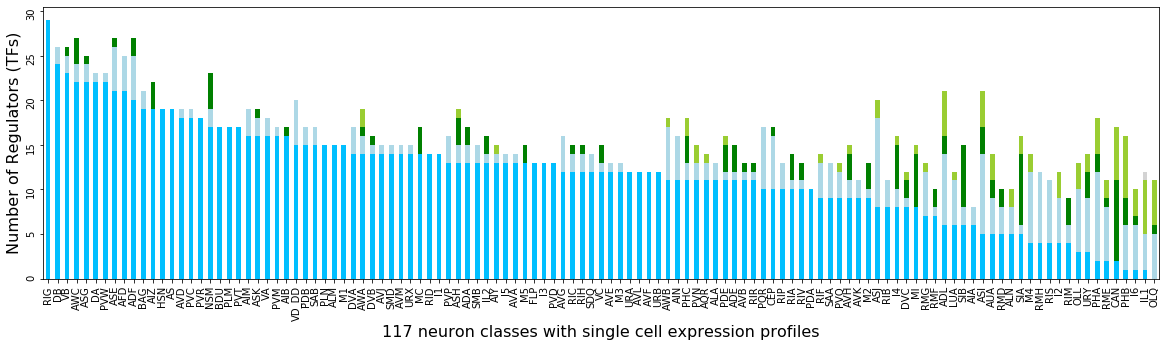

In [13]:
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize

ax=dn.plot.bar(stacked=True,figsize=(20,5),color=colorlist,legend=False)
xlabels=list(dn["neuron_class"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Number of Regulators (TFs)")
plt.xlabel("%s neuron classes with single cell expression profiles" %(len(dn)))
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig8C_bar_chart_TF_types_by_neuron_class_%s.pdf' %data_source)
plt.show()

In [14]:
#Figure 8C by TF
TFs=df["TF"].drop_duplicates().values
d=pd.DataFrame()
headers=['TF']+ models
for tf in TFs:
    r=df.loc[df['TF']==tf]
    mods=r["model"].values
    sizes=[getModel_count(mod,r) for mod in models]
    results=[tf]+sizes
    dictionary = dict(zip(headers, results))
    d=d.append(dictionary,ignore_index=True)
d=d[headers].sort_values(ascending=False,by=models).drop_duplicates()


In [15]:
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

In [16]:
d.head(2)
print(len(d))

137


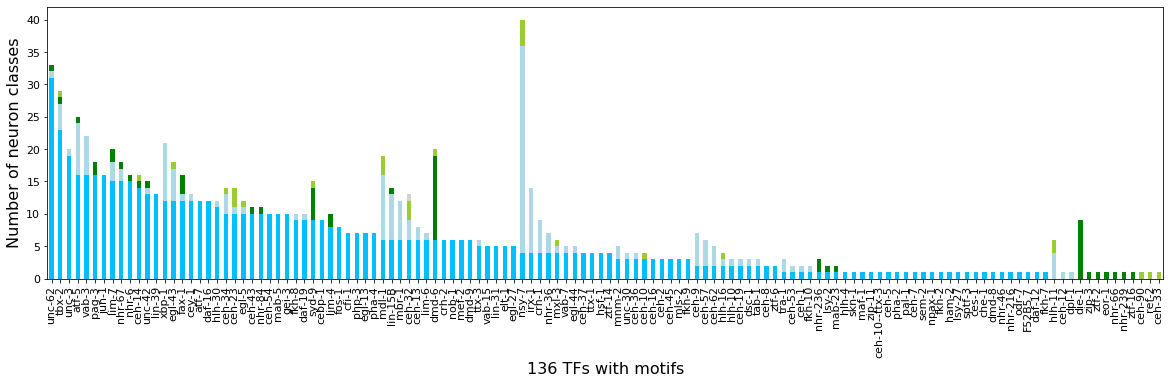

TF with motif 136


In [17]:
#use this plot plus first 4 of next plot
d5=d[9:]
plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('legend', fontsize=11)    # legend fontsize

ax=d5.plot.bar(stacked=True,figsize=(20,5),color=colorlist,legend=False)
xlabels=list(d5["TF"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=0)
plt.ylabel("Number of neuron classes")
plt.xlabel("%s TFs with motifs" %(len(d)-1))
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig8Cb_d5_bar_chart_TF_Models_by_TF_%s.pdf' %data_source)
plt.show()

print('TF with motif',len(d)-1)

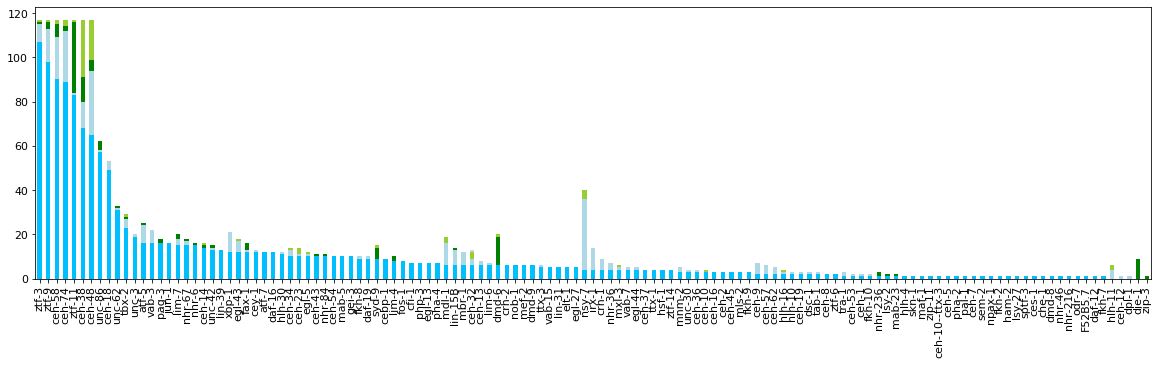

In [18]:
d=d[:-8]
plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('legend', fontsize=11)    # legend fontsize

ax=d.plot.bar(stacked=True,figsize=(20,5),color=colorlist,legend=False)
xlabels=list(d["TF"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=0)
#plt.ylabel("Number of neuron classes")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig8Ca_use_first_4_bar_chart_TF_Models_by_TF_%s.pdf' %data_source)
plt.show()


In [19]:
sc_df.head(2)

Unnamed: 0 model     TF     motif_ID neuron_class  marker_count  obs_motif  \
0           0   A-I  cfi-1  M01667_2.00          AVD           256        201   
1           1   A-I  cfi-1  M01667_2.00           DA           901        692   

    exp_motif        fc       hg_pval       rs_pval  best_subset_rs_pval  \
0  148.014731  1.357973  1.820000e-12  1.590000e-21         1.500000e-43   
1  520.942470  1.328362  2.060000e-34  2.230000e-56        4.050000e-130   

   num_genes_in_subset      hg_pval*      rs_pval*  best_subset_rs_pval*  
0                  123  7.420000e-12  1.940000e-20          7.620000e-43  
1                  414  1.040000e-32  1.380000e-53         4.190000e-128

In [20]:
sc_df.loc[sc_df["TF"]=="mbr-1"]

Unnamed: 0 model     TF     motif_ID neuron_class  marker_count  \
1179        1179  A-II  mbr-1  M00707_2.00          ADA           273   
1180        1180  A-II  mbr-1  M00707_2.00          AIM           240   
1181        1181  A-II  mbr-1  M00707_2.00          AIN           157   
1182        1182  A-II  mbr-1  M00707_2.00          AUA           200   
1183        1183   A-I  mbr-1  M00707_2.00          BAG           263   
1184        1184   A-I  mbr-1  M00707_2.00           DB          1280   
1185        1185   A-I  mbr-1  M00707_2.00          PDB           535   
1186        1186  A-II  mbr-1  M00707_2.00          PVP           180   
1187        1187   A-I  mbr-1  M00707_2.00          RIC           266   
1188        1188  A-II  mbr-1  M00707_2.00          RIP           134   
1189        1189   A-I  mbr-1  M00707_2.00          RIR           160   
1190        1190   A-I  mbr-1  M00707_2.00           VB          1275   

      obs_motif   exp_motif        fc       hg_pval       rs_pval  \
1179         70   46.301583  1.511827  1.713670e-04  2.454630e-01   
1180         78   40.704688  1.916241  2.570000e-09  6.186660e-02   
1181         58   26.627650  2.178187  1.410000e-09  3.290411e-01   
1182         48   33.920573  1.415070  6.653099e-03  8.166669e-01   
1183         79   44.605554  1.771080  9.770000e-08  9.104627e-03   
1184        391  217.091669  1.801082  1.600000e-35  9.900000e-12   
1185        171   90.737534  1.884556  5.500000e-18  1.430000e-08   
1186         58   30.528516  1.899863  3.730000e-07  4.678739e-02   
1187         87   45.114362  1.928432  2.200000e-10  2.225935e-03   
1188         48   22.726784  2.112045  1.080000e-07  1.555463e-01   
1189         60   27.136459  2.211048  3.710000e-10  3.186098e-02   
1190        308  216.243655  1.424319  8.170000e-12  1.860000e-07   

      best_subset_rs_pval  num_genes_in_subset      hg_pval*      rs_pval*  \
1179         2.750000e-09                   32  2.477370e-04  2.728670e-01   
1180         2.480000e-11                   27  6.970000e-09  7.422398e-02   
1181         3.750000e-08                   17  3.960000e-09  3.580798e-01   
1182         8.700000e-05                   15  8.128655e-03  8.309474e-01   
1183         3.840000e-12                   38  2.120000e-07  1.230226e-02   
1184         1.290000e-62                  186  9.960000e-34  4.240000e-11   
1185         3.210000e-29                   80  4.490000e-17  4.230000e-08   
1186         8.490000e-10                   24  7.560000e-07  5.720165e-02   
1187         2.930000e-14                   37  6.820000e-10  3.289437e-03   
1188         1.850000e-08                   15  2.320000e-07  1.774676e-01   
1189         2.840000e-09                   24  1.120000e-09  3.984227e-02   
1190         5.860000e-48                  141  3.100000e-11  4.750000e-07   

      best_subset_rs_pval*  
1179          3.010000e-09  
1180          2.850000e-11  
1181          4.000000e-08  
1182          8.840000e-05  
1183          4.490000e-12  
1184          1.460000e-61  
1185          8.120000e-29  
1186          9.350000e-10  
1187          3.690000e-14  
1188          1.980000e-08  
1189          3.100000e-09  
1190          3.500000e-47

In [21]:
sc.head(2)

Unnamed: 0  gene_name  PVP  RMH  RIP  PVT  AVH  M2  PVN  HSN  ...  PVC  \
0           1  21ur-7131    0    0    0    0    0   0    0    0  ...    1   
1           2  21ur-8256    0    0    0    0    0   0    0    0  ...    1   

   PVQ  ADF  RIS  ASJ  ASG  RIM  AIB  RIV  IL1  
0    0    0    0    0    0    1    0    0    0  
1    0    0    0    0    0    1    0    0    0  

[2 rows x 119 columns]

In [22]:
for n in sc.columns.values[2:]:
    if len(sc.loc[(sc["gene_name"]=='tra-1') & (sc[n]==1)])>0:
        print(n)

DA
PVW
AVG


In [23]:
#figure 8D.
print(models)
print('nc count, tf count per model',nclass_tf_sizes)

['A-I', 'A-II', 'B-I', 'B-II', 'C-I', 'C-II']
nc count, tf count per model [(116, 124), (91, 59), (47, 34), (33, 25), (1, 1), (0, 0)]


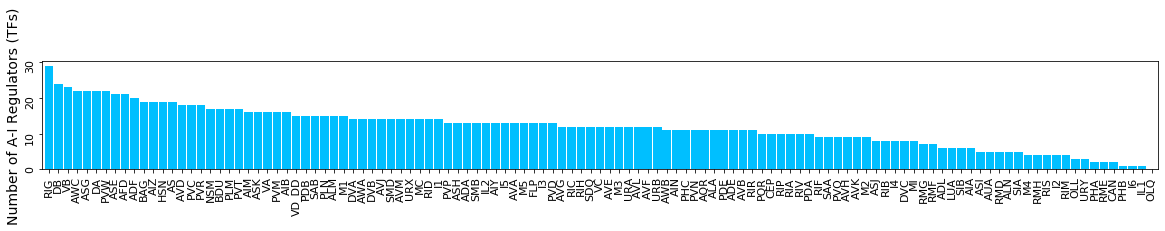

neuron classes with A-I regulators 116
RIG ztf-11, dmd-6, ztf-3, egl-13, pag-3, atf-7, mef-2, ceh-16, ceh-48, daf-16, syd-9, ceh-38, lim-6, fos-1, egl-27, ceh-74, cey-1, ztf-9, jun-1, egl-43, unc-62, atf-5, ceh-58, ztf-14, crh-2, hlh-10, ceh-62, nsy-7, crh-1
DB ztf-11, ztf-6, ceh-48, ceh-18, unc-3, ztf-3, ceh-38, mab-5, gei-3, lin-39, syd-9, cey-1, daf-16, ceh-58, ztf-9, vab-7, unc-62, ceh-13, egl-27, crh-2, vab-3, ceh-74, mbr-1, lin-15B
VB cebp-1, ceh-48, ceh-38, atf-7, ztf-6, unc-3, ceh-18, mab-5, pag-3, ztf-3, jun-1, lin-39, cey-1, ztf-9, ceh-58, ceh-13, lin-15B, crh-2, unc-62, mbr-1, ceh-74, vab-3, xbp-1
AWC ztf-11, gei-3, atf-7, nhr-6, ztf-3, ceh-18, ceh-36, ceh-54, ceh-58, ceh-23, atf-5, ceh-74, daf-16, tbx-2, mxl-3, lim-7, ztf-9, daf-19, dmd-9, dsc-1, nhr-36, hlh-30
ASG ztf-11, ceh-18, nhr-84, atf-7, fkh-8, ceh-37, ceh-54, jun-1, syd-9, ztf-3, npax-1, dmd-9, ztf-9, nhr-67, unc-30, ceh-38, ceh-74, ceh-48, ceh-23, ceh-58, irx-1, atf-5
DA ztf-11, cfi-1, unc-3, ceh-38, ztf-3, ceh-18

I6 ceh-34
IL1 ceh-43
OLQ 


In [33]:
outfile=open('../../output/Supp.Table.2E_by_nc.txt','w')

plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=11)    # legend fontsize

ax=dn[["neuron_class","A-I"]].plot.bar(stacked=True,figsize=(20,2),color=colorlist,legend=False,width=.9)
xlabels=list(dn["neuron_class"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Number of A-I Regulators (TFs)")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig8C_bar_chart_TF_types_by_neuron_class_A-I_only_%s.pdf' %data_source)
plt.show()

print('neuron classes with A-I regulators',len(df[df["model"]=="A-I"]["neuron_class"].drop_duplicates()))
for nc in dn.neuron_class.values:
    r=df.loc[(df["model"]=="A-I") & (df["neuron_class"]==nc)].sort_values(ascending=True,by=['rs_pval*'])
    TFs=r["TF"].drop_duplicates().values
    tfs=''
    for i in TFs[:]:
        #if len(TFs)>10:
        #    etc='.......'
        #else:
        #    etc=''
        tfs=tfs+'%s, ' %(i)
    #tfs=tfs+ etc
    #print(nc,'\t\t', cfs)
    #get rid of trailing commas
    tfs=tfs[:-2]
    #print(nc, tfs)
    print(nc, tfs)
    outfile.write("%s\t%s\n" %(nc, tfs))
outfile.close()

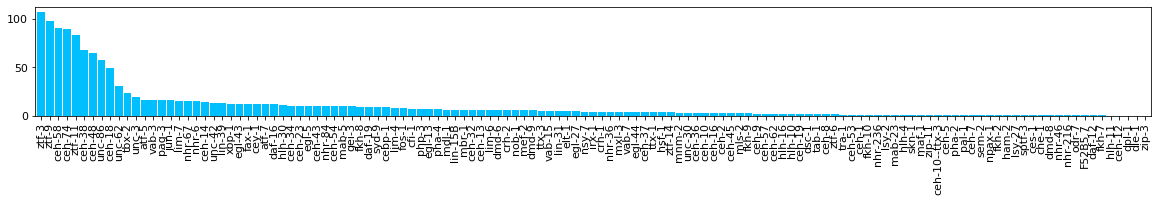

ztf-3 , DB, DA, RIG, PDB, PVW, AIZ, NSM, VB, VA, HSN, SMD, AS, M1, I4, PVC, AVA, MC, I1, IL2, PLM, AVG, M2, RIA, RIH, SMB, BDU, AVD, URB, ALM, PVD, I3, AVJ, VC, URA, PVR, RIC, AIM, VD_DD, PVM, AFD, RIM, AIB, M5, I5, AVM, URX, PLN, PVP, MI, AWC, BAG, AVF, PDA, RID, ASK, SIA, DVB, FLP, AVL, ASG, ADF, RIR, M3, AIN, ASE, SAB, RIP, AIY, SDQ, AVE, ALA, AVH, RMD, PVN, CEP, AQR, AVB, DVC, RMF, AWB, ASH, RIV, ADE, LUA, PVQ, AVK, SIB, PVT, RIB, PHC, DVA, PQR, AUA, SAA, AIA, ASI, M4, RME, ADA, ASJ, AWA, RIF, PHA, RMG, ADL, OLL, PDE
ztf-9 , DB, DA, RIG, SMD, HSN, PDB, AVG, SMB, PVW, AIZ, AIB, RIA, VA, PVC, NSM, VB, AVD, AS, M1, PDA, PLM, ALM, AVA, AIM, AVJ, IL2, DVC, AVM, BDU, URB, RIH, AVL, ASK, PVR, VC, URA, MC, AVF, SIB, I4, RID, AVH, I1, DVB, AIN, RIV, AFD, BAG, RIR, PVD, PVT, SAB, VD_DD, ASG, I3, AIY, RIC, M5, RIM, PVM, FLP, PLN, AVK, ALA, PHC, ADA, RMF, AWC, PVP, AVE, URX, ADE, PVQ, ASE, RIB, ADF, M3, M2, RIP, DVA, PDE, PQR, LUA, AVB, AQR, CEP, AIA, AWA, I5, RMD, ALN, URY, RMG, RIF, PVN, I2,

In [32]:
outfile=open('../../output/Supp.Table.2E_by_TF.txt','w')
plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=11)    # legend fontsize

ax=d[['TF',"A-I"]].plot.bar(stacked=True,figsize=(20,2),color=colorlist,legend=False,width=.9)
xlabels=list(d["TF"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=0)
#plt.ylabel("Number of neuron classes")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig8Cb_bar_chart_TF_Models_by_TF_A-I_only%s.pdf' %data_source)
plt.show()

for tf in d.TF.values:
    r=df.loc[(df["model"]=="A-I") & (df["TF"]==tf)].sort_values(ascending=True,by=['rs_pval*'])
    
    nclasses=r["neuron_class"].drop_duplicates().values
    #print(tf,nclasses[:5])
    ncs=''
    for nc in nclasses[:]:
        ncs=ncs+'%s, ' %nc
    #print(tf,'\t\t',ncs)
    
    #if len(nclasses)>10:
    #    etc='.......'
    #else:
    #    etc=''
    
    #ncs=ncs+ etc
    #get rid of trailing commas
    ncs=ncs[:-2]
    
    print(tf,",", ncs)
    outfile.write('%s\t%s\n' %(tf,ncs))
outfile.close()